In [86]:
## THE DATASET CONTAINS HISTORICAL SALES DATA FOR 45  WALMART STORES LOCATED IN DIFFERENT REGIONS. EACH STORE CONTAINS A NUMBER
## OF DEPARTMENTS AND THE MAIN GOAL IS TO CORRECTLY PREDICT THE WEEKLY SALES.

In [87]:
## OVERVIEW
# 1) UNDERSTAND THE DATA (INFO, DESCRIBE, Nº OF MISSING VALUES, ETC...)
# 2) DATA EXPLORATION
# 3) DATA CLEANING
# 4) FEATURE ENGINEERING
# 5) OUTLIERS
# 6) SKEW?
# 7) MODEL BUILDING 
# 8) MODEL PERFORMANCE
# 9) RESULTS 

In [88]:
import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline


In [89]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [90]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [91]:
df_test.head(1)

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False


In [92]:
df_stores = pd.read_csv('stores.csv')

In [93]:
df_stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [94]:
df_features = pd.read_csv('features.csv')


In [95]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [96]:
df_feat_stores = df_features.merge(df_stores,how='inner',on='Store')

In [97]:
df_feat_stores.head(4)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315


In [98]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [99]:
df_test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [100]:
df_train = df_train.merge(df_feat_stores,how='inner',on=['Store','Date','IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [101]:
df_test = df_test.merge(df_feat_stores,how='inner',on=['Store','Date','IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)
df_test.head()


,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
1,1,1,2012-11-09,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,A,151315
2,1,1,2012-11-16,False,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,A,151315
3,1,1,2012-11-23,True,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,A,151315
4,1,1,2012-11-30,False,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,A,151315


In [102]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


In [103]:
df_train.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [104]:
df_train.iloc[df_train['Weekly_Sales'].idxmax()]

Store                   10
Dept                    72
Date            2010-11-26
Weekly_Sales        693099
IsHoliday             True
Temperature          55.33
Fuel_Price           3.162
MarkDown1              NaN
MarkDown2              NaN
MarkDown3              NaN
MarkDown4              NaN
MarkDown5              NaN
CPI                126.669
Unemployment         9.003
Type                     B
Size                126512
Name: 95373, dtype: object

In [105]:
df_train.iloc[df_train['Weekly_Sales'].idxmin()]

Store                   28
Dept                     6
Date            2010-10-08
Weekly_Sales      -4988.94
IsHoliday            False
Temperature          71.82
Fuel_Price           3.013
MarkDown1              NaN
MarkDown2              NaN
MarkDown3              NaN
MarkDown4              NaN
MarkDown5              NaN
CPI                126.279
Unemployment        14.313
Type                     A
Size                206302
Name: 267730, dtype: object

In [106]:
df_train.describe().columns

Index(['Store', 'Dept', 'Weekly_Sales', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Size'],
      dtype='object')

In [107]:
100*df_train.isnull().sum()/(df_train.shape[0]*df_train.shape[1])

Store           0.000000
Dept            0.000000
Date            0.000000
Weekly_Sales    0.000000
IsHoliday       0.000000
Temperature     0.000000
Fuel_Price      0.000000
MarkDown1       4.016074
MarkDown2       4.600689
MarkDown3       4.217553
MarkDown4       4.249042
MarkDown5       4.004940
CPI             0.000000
Unemployment    0.000000
Type            0.000000
Size            0.000000
dtype: float64

In [108]:
100*df_test.isnull().sum()/(df_test.shape[0]*df_test.shape[1])

Store           0.000000
Dept            0.000000
Date            0.000000
IsHoliday       0.000000
Temperature     0.000000
Fuel_Price      0.000000
MarkDown1       0.008633
MarkDown2       1.658613
MarkDown3       0.569480
MarkDown4       0.746715
MarkDown5       0.000000
CPI             2.211059
Unemployment    2.211059
Type            0.000000
Size            0.000000
dtype: float64

In [109]:

df_train['Date'].apply(type)

0         <class 'str'>
1         <class 'str'>
2         <class 'str'>
3         <class 'str'>
4         <class 'str'>
              ...      
421565    <class 'str'>
421566    <class 'str'>
421567    <class 'str'>
421568    <class 'str'>
421569    <class 'str'>
Name: Date, Length: 421570, dtype: object

In [110]:
for df in [df_train,df_test]:
    df['Date'] = pd.to_datetime(df['Date'])
    df['Month'] = df['Date'].apply(lambda t:t.month)
    df['Week'] = df['Date'].apply(lambda t:t.week)
    df['Year'] = df['Date'].apply(lambda t:t.year)
    
    
    

In [111]:
df_train = df_train.drop('Date',axis=1)
df_test = df_test.drop('Date',axis=1)



In [112]:
weekly_sales_2010 = df_train[df_train['Year'] == 2010]['Weekly_Sales'].groupby(df_train['Week']).sum()
weekly_sales_2011 = df_train[df_train['Year'] == 2011]['Weekly_Sales'].groupby(df_train['Week']).sum()
weekly_sales_2012 = df_train[df_train['Year'] == 2012]['Weekly_Sales'].groupby(df_train['Week']).sum()





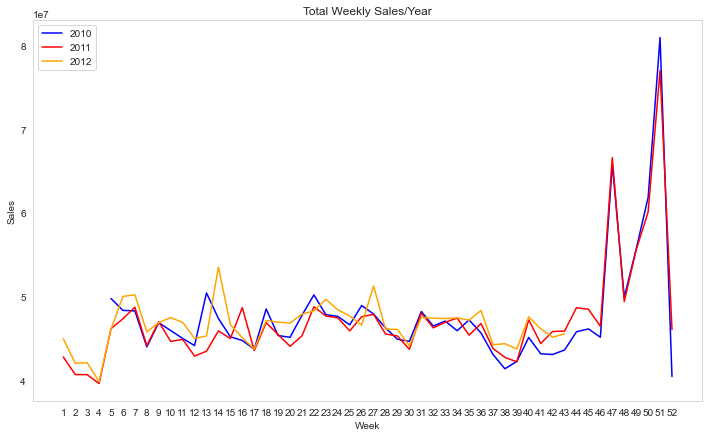

In [113]:
plt.figure(figsize=(12,7))
sns.lineplot(weekly_sales_2010.index,weekly_sales_2010.values,color='blue')
sns.lineplot(weekly_sales_2011.index,weekly_sales_2011.values,color='red')
sns.lineplot(weekly_sales_2012.index,weekly_sales_2012.values,color='orange')
plt.grid()
plt.legend(['2010','2011','2012'],loc='best')
plt.xticks(np.arange(1,53,step=1))
plt.xlabel('Week')
plt.ylabel('Sales')

plt.title('Total Weekly Sales/Year')
plt.show()

In [114]:
weekly_sales_store = df_train['Weekly_Sales'].groupby(df_train['Store']).sum()


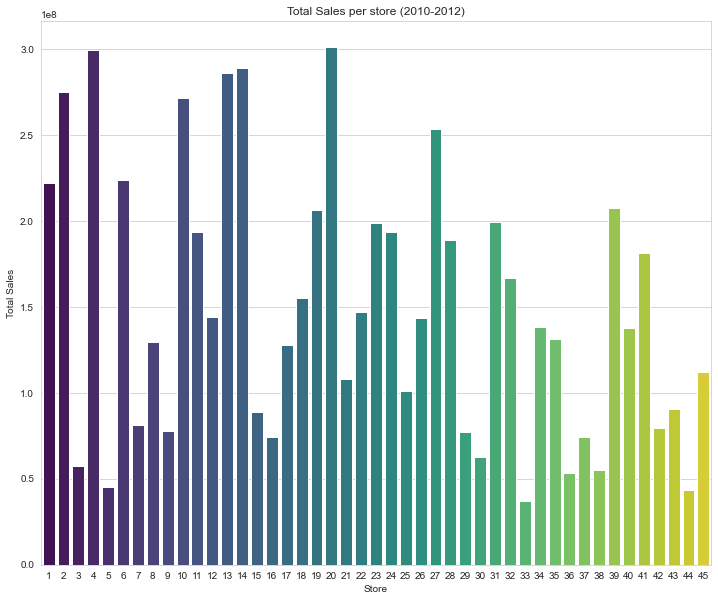

In [115]:
plt.figure(figsize=(12,10))
sns.barplot(x=weekly_sales_store.index,y=weekly_sales_store,palette='viridis')

plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.title('Total Sales per store (2010-2012)')
plt.show()


In [116]:
##Store 4 y 20 son los que producen mayor numero de ventas---Stores mas rentables
##Store 5,33,44 son los que producen menor numero de ventas---Stores menos rentables
#Vamos a analizar estos stores mas profundamente
#PD: si tuviesemos gastos por Store deberiamos plantearnos si cerrar algunos de los que producen pocas ventas.


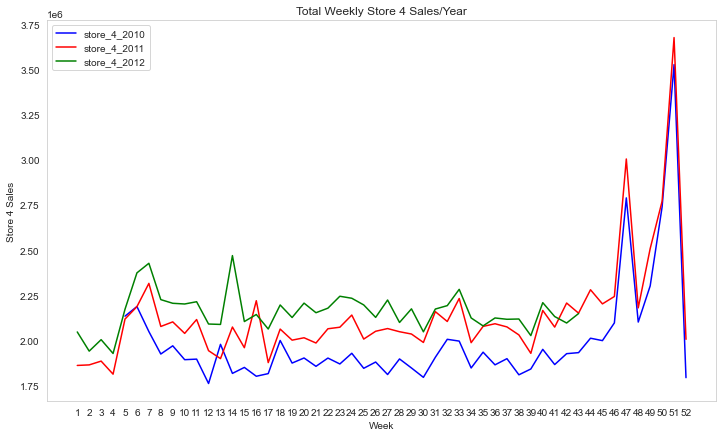

In [117]:

#Store 4
weekly_sales_store4_year2010 = df_train[(df_train['Store'] == 4) & (df_train['Year'] == 2010)]['Weekly_Sales'].groupby(df_train['Week']).sum()
weekly_sales_store4_year2011 = df_train[(df_train['Store'] == 4) & (df_train['Year'] == 2011)]['Weekly_Sales'].groupby(df_train['Week']).sum()
weekly_sales_store4_year2012 = df_train[(df_train['Store'] == 4) & (df_train['Year'] == 2012)]['Weekly_Sales'].groupby(df_train['Week']).sum()


plt.figure(figsize=(12,7))
sns.lineplot(weekly_sales_store4_year2010.index,weekly_sales_store4_year2010.values,color='blue')
sns.lineplot(weekly_sales_store4_year2011.index,weekly_sales_store4_year2011.values,color='red')
sns.lineplot(weekly_sales_store4_year2012.index,weekly_sales_store4_year2012.values,color='green')

plt.grid()
plt.legend(['store_4_2010','store_4_2011','store_4_2012'],loc='best')
plt.xticks(np.arange(1,53,step=1))
plt.xlabel('Week')
plt.ylabel('Store 4 Sales')

plt.title('Total Weekly Store 4 Sales/Year')
plt.show()

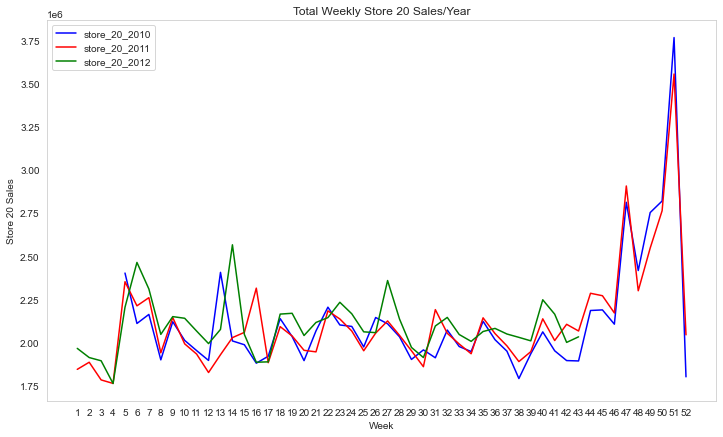

In [118]:
#Store 20
weekly_sales_store20_year2010 = df_train[(df_train['Store'] == 20) & (df_train['Year'] == 2010)]['Weekly_Sales'].groupby(df_train['Week']).sum()
weekly_sales_store20_year2011 = df_train[(df_train['Store'] == 20) & (df_train['Year'] == 2011)]['Weekly_Sales'].groupby(df_train['Week']).sum()
weekly_sales_store20_year2012 = df_train[(df_train['Store'] == 20) & (df_train['Year'] == 2012)]['Weekly_Sales'].groupby(df_train['Week']).sum()


plt.figure(figsize=(12,7))
sns.lineplot(weekly_sales_store20_year2010.index,weekly_sales_store20_year2010.values,color='blue')
sns.lineplot(weekly_sales_store20_year2011.index,weekly_sales_store20_year2011.values,color='red')
sns.lineplot(weekly_sales_store20_year2012.index,weekly_sales_store20_year2012.values,color='green')

plt.grid()
plt.legend(['store_20_2010','store_20_2011','store_20_2012'],loc='best')
plt.xticks(np.arange(1,53,step=1))
plt.xlabel('Week')
plt.ylabel('Store 20 Sales')

plt.title('Total Weekly Store 20 Sales/Year')
plt.show()

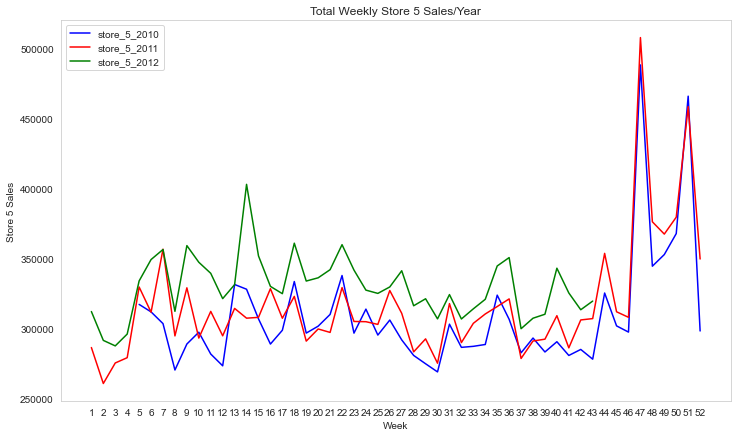

In [119]:
#Store 5
weekly_sales_store5_year2010 = df_train[(df_train['Store'] == 5) & (df_train['Year'] == 2010)]['Weekly_Sales'].groupby(df_train['Week']).sum()
weekly_sales_store5_year2011 = df_train[(df_train['Store'] == 5) & (df_train['Year'] == 2011)]['Weekly_Sales'].groupby(df_train['Week']).sum()
weekly_sales_store5_year2012 = df_train[(df_train['Store'] == 5) & (df_train['Year'] == 2012)]['Weekly_Sales'].groupby(df_train['Week']).sum()


plt.figure(figsize=(12,7))
sns.lineplot(weekly_sales_store5_year2010.index,weekly_sales_store5_year2010.values,color='blue')
sns.lineplot(weekly_sales_store5_year2011.index,weekly_sales_store5_year2011.values,color='red')
sns.lineplot(weekly_sales_store5_year2012.index,weekly_sales_store5_year2012.values,color='green')

plt.grid()
plt.legend(['store_5_2010','store_5_2011','store_5_2012'],loc='best')
plt.xticks(np.arange(1,53,step=1))
plt.xlabel('Week')
plt.ylabel('Store 5 Sales')

plt.title('Total Weekly Store 5 Sales/Year')
plt.show()

In [120]:
#Aunque hemos comprobado anteriormente que es uno de los Store con menor ventas, se puede observar que la tendencia es positiva
#a lo largo de los años. Las ventas estan aumentando con el paso de los años en el Store Nº5

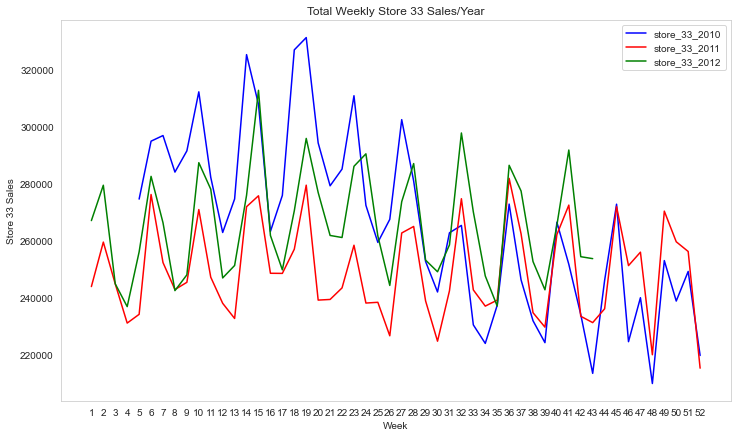

In [121]:
#Store 33
weekly_sales_store33_year2010 = df_train[(df_train['Store'] == 33) & (df_train['Year'] == 2010)]['Weekly_Sales'].groupby(df_train['Week']).sum()
weekly_sales_store33_year2011 = df_train[(df_train['Store'] == 33) & (df_train['Year'] == 2011)]['Weekly_Sales'].groupby(df_train['Week']).sum()
weekly_sales_store33_year2012 = df_train[(df_train['Store'] == 33) & (df_train['Year'] == 2012)]['Weekly_Sales'].groupby(df_train['Week']).sum()


plt.figure(figsize=(12,7))
sns.lineplot(weekly_sales_store33_year2010.index,weekly_sales_store33_year2010.values,color='blue')
sns.lineplot(weekly_sales_store33_year2011.index,weekly_sales_store33_year2011.values,color='red')
sns.lineplot(weekly_sales_store33_year2012.index,weekly_sales_store33_year2012.values,color='green')

plt.grid()
plt.legend(['store_33_2010','store_33_2011','store_33_2012'],loc='best')
plt.xticks(np.arange(1,53,step=1))
plt.xlabel('Week')
plt.ylabel('Store 33 Sales')

plt.title('Total Weekly Store 33 Sales/Year')
plt.show()

In [122]:
##Se puede observar que a pesar de que durante los dos primeros cuartos de año las ventas disminuyeron en comparacion
#con el año 2010, se puede observar que a partir de la semana 28-29 el año 2012 es el que mejor datos refleja. 

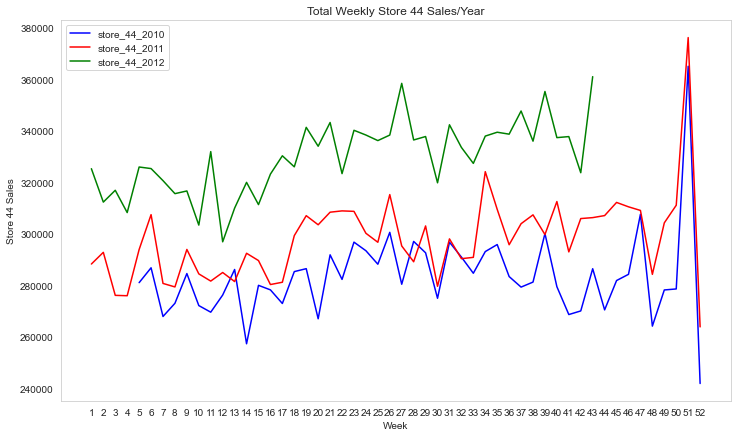

In [123]:
#Store 44
weekly_sales_store44_year2010 = df_train[(df_train['Store'] == 44) & (df_train['Year'] == 2010)]['Weekly_Sales'].groupby(df_train['Week']).sum()
weekly_sales_store44_year2011 = df_train[(df_train['Store'] == 44) & (df_train['Year'] == 2011)]['Weekly_Sales'].groupby(df_train['Week']).sum()
weekly_sales_store44_year2012 = df_train[(df_train['Store'] == 44) & (df_train['Year'] == 2012)]['Weekly_Sales'].groupby(df_train['Week']).sum()


plt.figure(figsize=(12,7))
sns.lineplot(weekly_sales_store44_year2010.index,weekly_sales_store44_year2010.values,color='blue')
sns.lineplot(weekly_sales_store44_year2011.index,weekly_sales_store44_year2011.values,color='red')
sns.lineplot(weekly_sales_store44_year2012.index,weekly_sales_store44_year2012.values,color='green')

plt.grid()
plt.legend(['store_44_2010','store_44_2011','store_44_2012'],loc='best')
plt.xticks(np.arange(1,53,step=1))
plt.xlabel('Week')
plt.ylabel('Store 44 Sales')

plt.title('Total Weekly Store 44 Sales/Year')
plt.show()

In [124]:
#Aunque hemos comprobado anteriormente que es uno de los Store con menor ventas, se puede observar que la tendencia es claramente
#positiva a lo largo de los años. Las ventas estan aumentando con el paso de los años en el Store Nº44

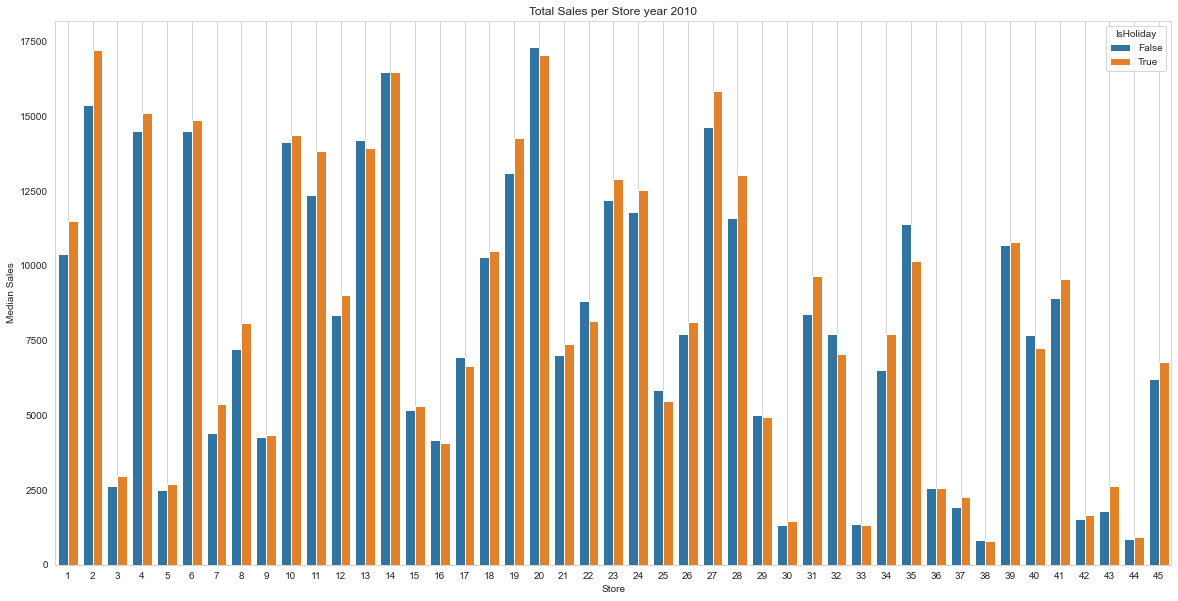

In [125]:
#Comprobamos influencia en ventas con festividad 

#2010
byholiday_2010 = pd.DataFrame(data = df_train[df_train['Year'] == 2010][['IsHoliday','Store','Weekly_Sales']].groupby([df_train['IsHoliday'],df_train['Store']]).median())
plt.figure(figsize=(20,10))
sns.barplot(x='Store',y='Weekly_Sales',hue='IsHoliday',data=byholiday_2010)
plt.title('Total Sales per Store year 2010')
plt.grid()
plt.xlabel('Store')
plt.ylabel('Median Sales')
plt.show()




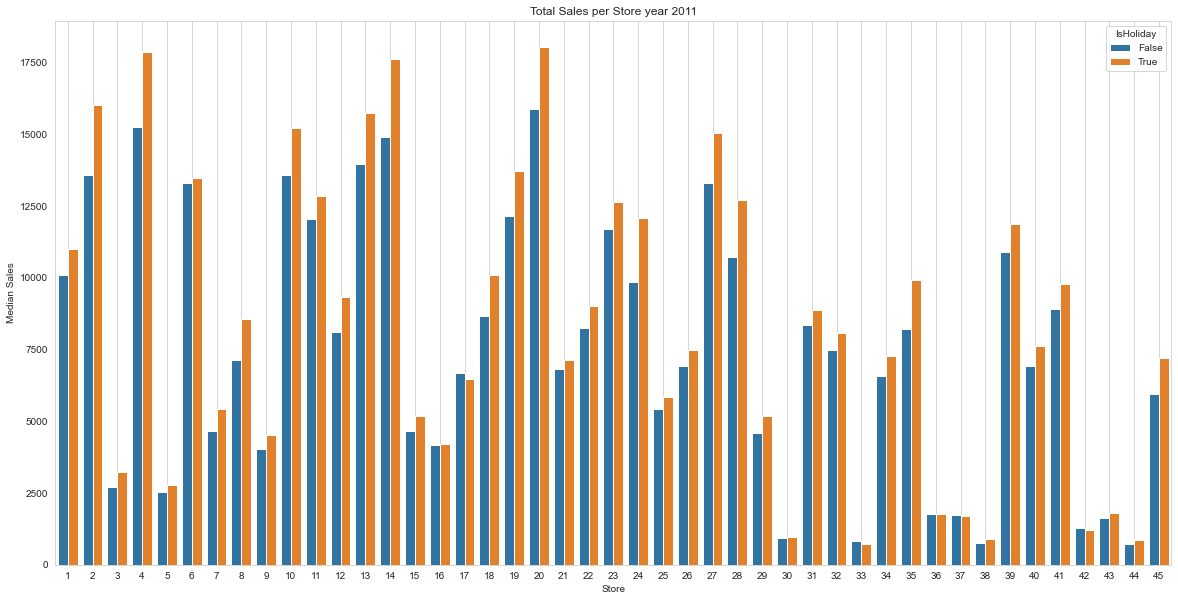

In [126]:
#2011
byholiday_2011 = pd.DataFrame(data = df_train[df_train['Year'] == 2011][['IsHoliday','Store','Weekly_Sales']].groupby([df_train['IsHoliday'],df_train['Store']]).median())
plt.figure(figsize=(20,10))
sns.barplot(x='Store',y='Weekly_Sales',hue='IsHoliday',data=byholiday_2011)
plt.title('Total Sales per Store year 2011')
plt.grid()
plt.xlabel('Store')
plt.ylabel('Median Sales')
plt.show()

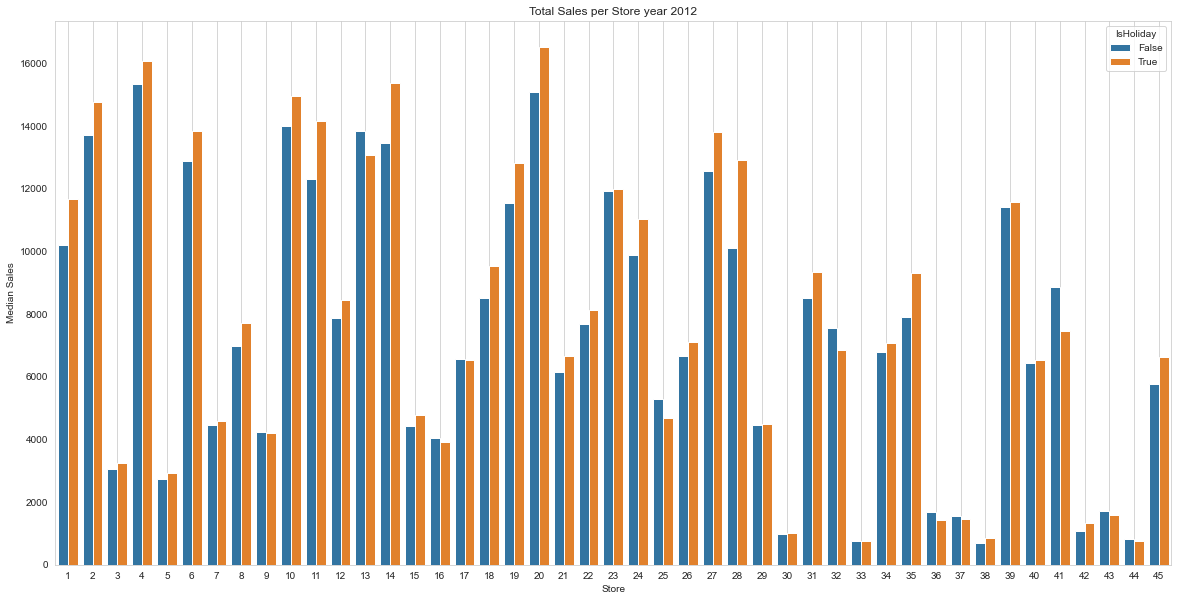

In [127]:
#2012
byholiday_2012 = pd.DataFrame(data = df_train[df_train['Year'] == 2012][['IsHoliday','Store','Weekly_Sales']].groupby([df_train['IsHoliday'],df_train['Store']]).median())
plt.figure(figsize=(20,10))
sns.barplot(x='Store',y='Weekly_Sales',hue='IsHoliday',data=byholiday_2012)
plt.title('Total Sales per Store year 2012')
plt.grid()
plt.xlabel('Store')
plt.ylabel('Median Sales')
plt.show()

In [128]:

#13,16,25,32,36,37 han vendido más en 2/3 años durante dias laborales
#17 han vendido más 3/3 años durante dias laborales
##Si tuvieramos los costes de los stores podriamos calcular si sale rentable abrilos en dias festivos/vacaciones 

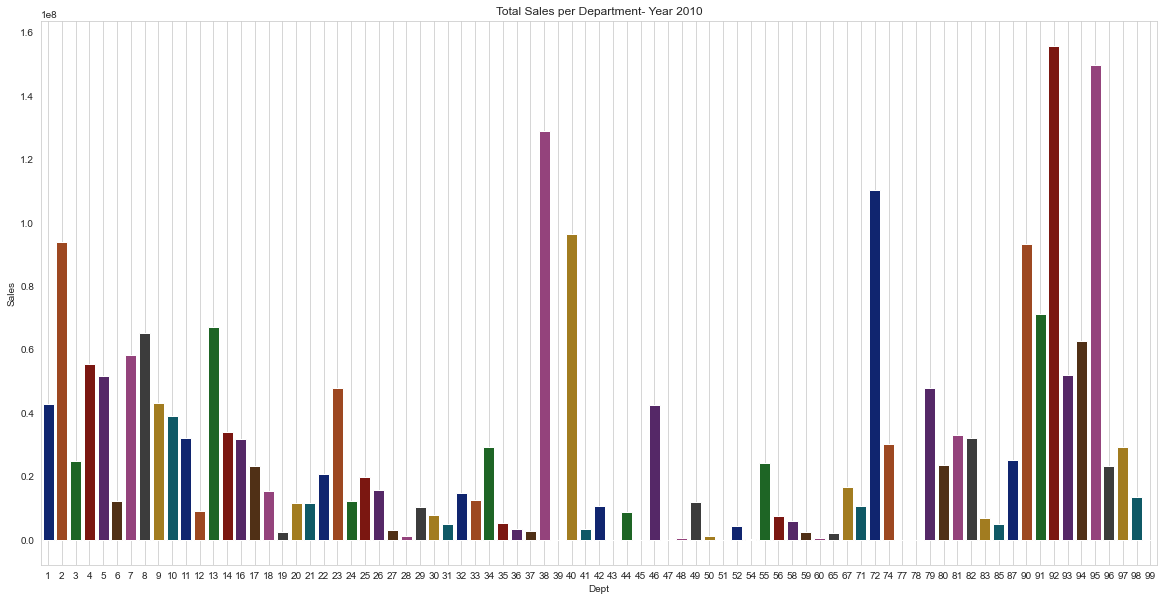

In [129]:
#2010
weekly_sales_dept = df_train[df_train['Year'] == 2010]['Weekly_Sales'].groupby(df_train['Dept']).sum()
plt.figure(figsize=(20,10))
sns.barplot(x=weekly_sales_dept.index,y=weekly_sales_dept.values,palette='dark')
plt.grid()
plt.title('Total Sales per Department- Year 2010')
plt.xlabel('Dept')
plt.ylabel('Sales')

plt.show()

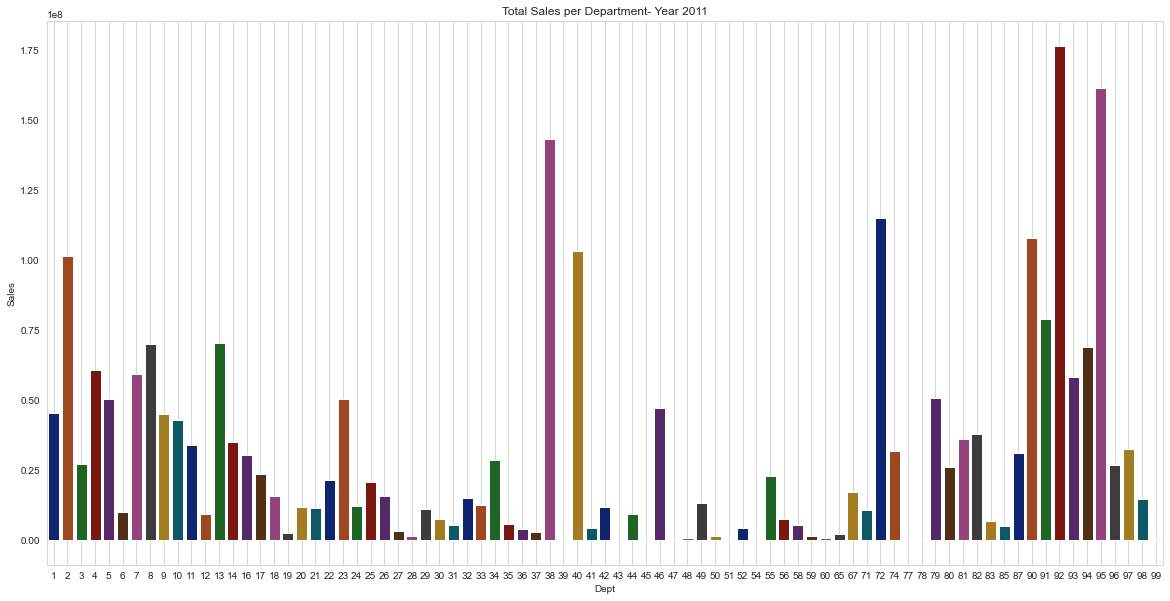

In [130]:
#2011
weekly_sales_dept = df_train[df_train['Year'] == 2011]['Weekly_Sales'].groupby(df_train['Dept']).sum()
plt.figure(figsize=(20,10))
sns.barplot(x=weekly_sales_dept.index,y=weekly_sales_dept.values,palette='dark')
plt.grid()
plt.title('Total Sales per Department- Year 2011')
plt.xlabel('Dept')
plt.ylabel('Sales')

plt.show()

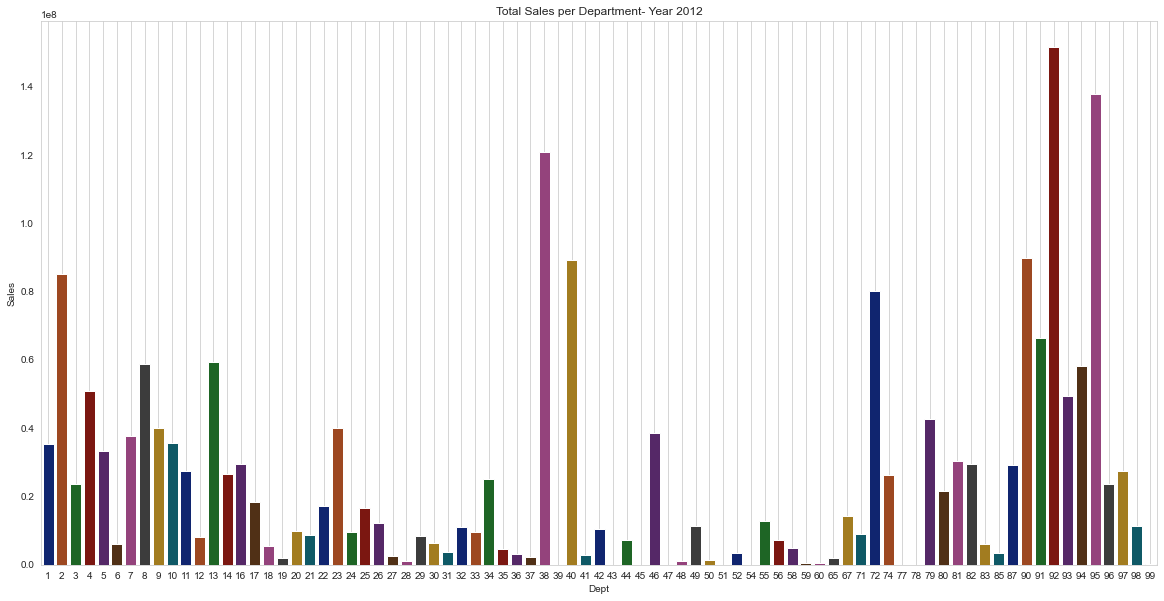

In [131]:
#2012
weekly_sales_dept = df_train[df_train['Year'] == 2012]['Weekly_Sales'].groupby(df_train['Dept']).sum()
plt.figure(figsize=(20,10))
sns.barplot(x=weekly_sales_dept.index,y=weekly_sales_dept.values,palette='dark')
plt.grid()
plt.title('Total Sales per Department- Year 2012')
plt.xlabel('Dept')
plt.ylabel('Sales')

plt.show()

In [132]:
##Tenemos algunos departamentos que ni si quiera venden, o venden muy poco. Pensar si retirar estos departamentos.
# no tienen ninguna utilidad. Nos ocupan espacio. 


In [133]:
df_train.corr()['Weekly_Sales'].sort_values(ascending=False)

Weekly_Sales    1.000000
Size            0.243828
Dept            0.148032
MarkDown5       0.090362
MarkDown1       0.085251
MarkDown3       0.060385
MarkDown4       0.045414
Month           0.028409
Week            0.027673
MarkDown2       0.024130
IsHoliday       0.012774
Fuel_Price     -0.000120
Temperature    -0.002312
Year           -0.010111
CPI            -0.020921
Unemployment   -0.025864
Store          -0.085195
Name: Weekly_Sales, dtype: float64

In [134]:
df_train = df_train.drop(['MarkDown5','MarkDown1','MarkDown2','MarkDown3','MarkDown4','CPI','Unemployment'],axis=1)
df_test = df_test.drop(['MarkDown5','MarkDown1','MarkDown2','MarkDown3','MarkDown4','CPI','Unemployment'],axis=1)


In [135]:
df_train.isnull().any()

Store           False
Dept            False
Weekly_Sales    False
IsHoliday       False
Temperature     False
Fuel_Price      False
Type            False
Size            False
Month           False
Week            False
Year            False
dtype: bool

In [136]:
df_test.isnull().any()

Store          False
Dept           False
IsHoliday      False
Temperature    False
Fuel_Price     False
Type           False
Size           False
Month          False
Week           False
Year           False
dtype: bool

In [137]:
df_train.corr()['Weekly_Sales'].sort_values(ascending=False)

Weekly_Sales    1.000000
Size            0.243828
Dept            0.148032
Month           0.028409
Week            0.027673
IsHoliday       0.012774
Fuel_Price     -0.000120
Temperature    -0.002312
Year           -0.010111
Store          -0.085195
Name: Weekly_Sales, dtype: float64

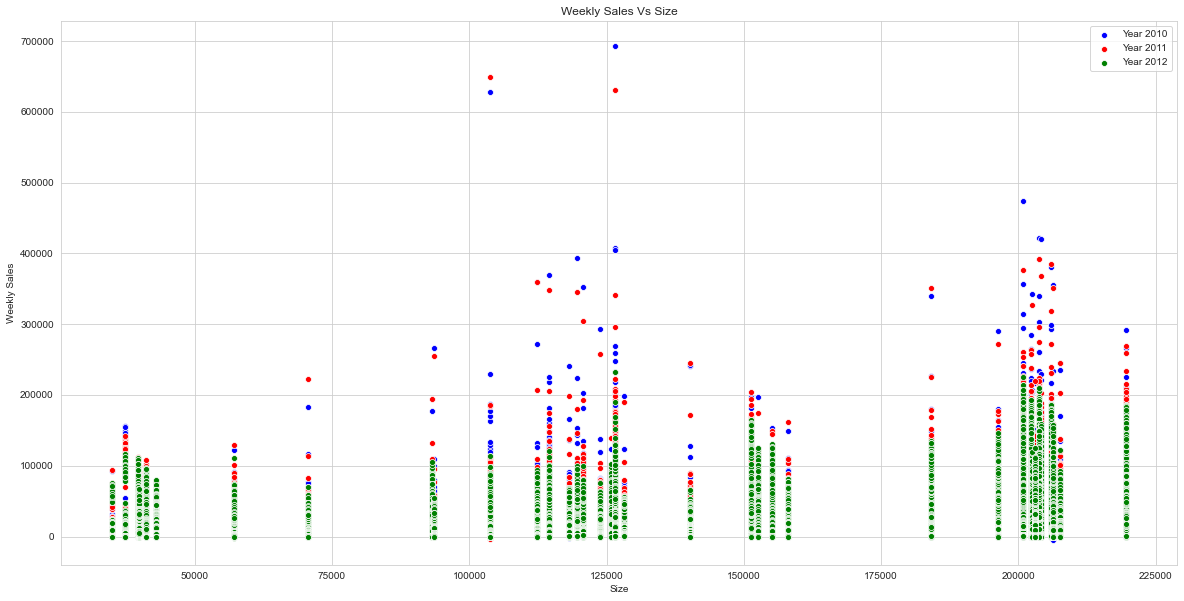

In [138]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Size',y='Weekly_Sales',data=df_train[df_train['Year'] == 2010],color='blue')
sns.scatterplot(x='Size',y='Weekly_Sales',data=df_train[df_train['Year'] == 2011],color='red')
sns.scatterplot(x='Size',y='Weekly_Sales',data=df_train[df_train['Year'] == 2012],color='green')
plt.legend(['Year 2010','Year 2011','Year 2012'])
plt.xlabel('Size')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales Vs Size')
plt.show()

In [139]:
##OUTLIERS

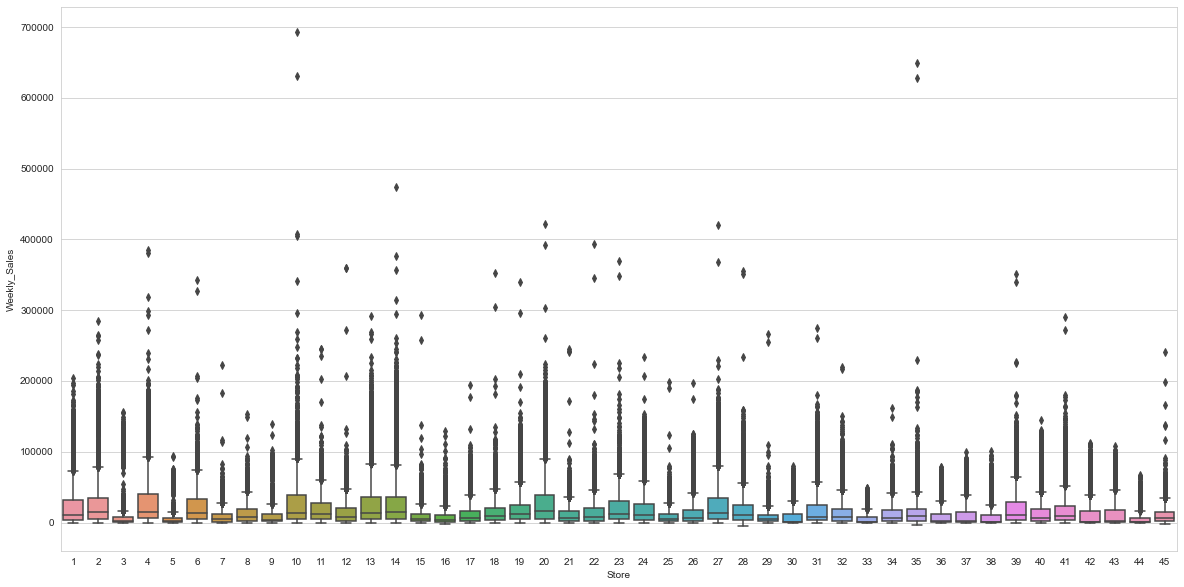

In [140]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Store',y='Weekly_Sales',data=df_train)

In [141]:
store_group = df_train.groupby('Store')['Weekly_Sales']

In [142]:
Q1 = store_group.quantile(0.25)
Q3 = store_group.quantile(0.75)
IIQ = Q3-Q1
lower_limit = Q1 - 1.5*IIQ
upper_limit = Q3 + 1.5*IIQ

In [143]:
df_train1 = pd.DataFrame()
for store in store_group.groups.keys():
    
    is_store = df_train['Store'] == store
    accept_limit = (df_train['Weekly_Sales'] >= lower_limit[store]) & (df_train['Weekly_Sales'] <= upper_limit[store])
    select = is_store & accept_limit
    data_selected = df_train[select]
    df_train1 = pd.concat([df_train1,data_selected])


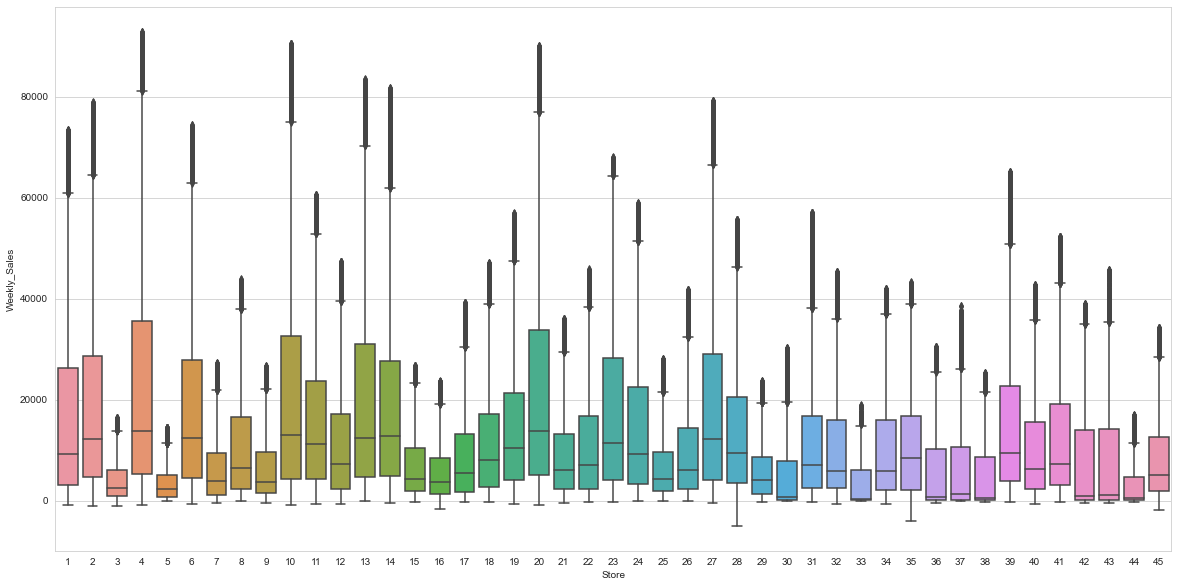

In [144]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Store',y='Weekly_Sales',data=df_train1)

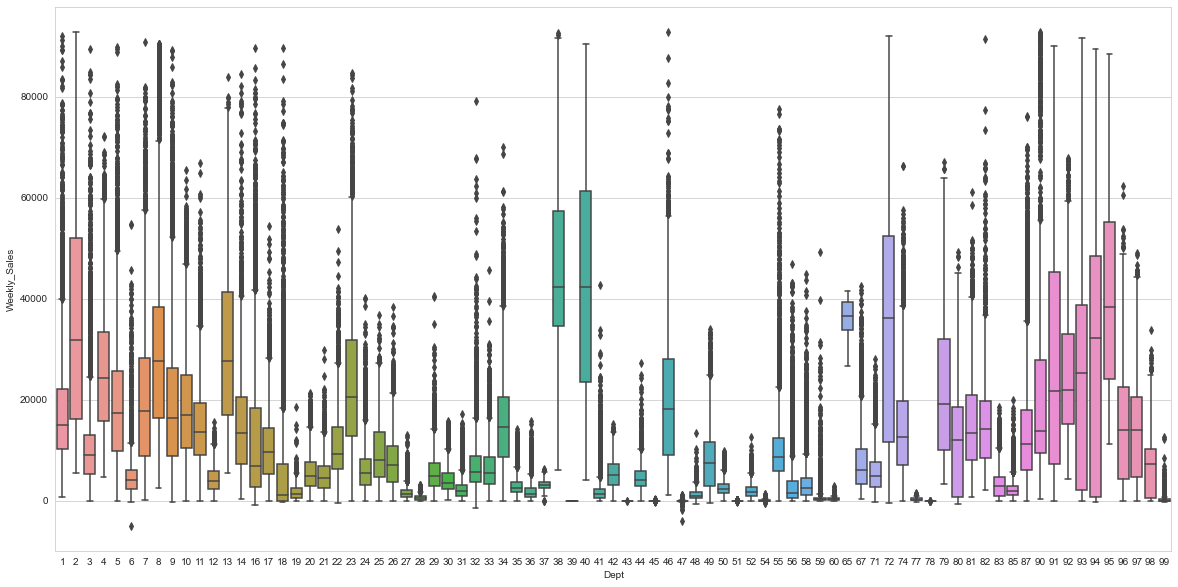

In [145]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Dept',y='Weekly_Sales',data=df_train1)

In [146]:
dept_group = df_train1.groupby('Dept')['Weekly_Sales']

In [147]:
Q1 = dept_group.quantile(0.25)
Q3 = dept_group.quantile(0.75)
IIQ = Q3-Q1
lower_limit = Q1 - 1.5*IIQ
upper_limit = Q3 + 1.5*IIQ

In [148]:
df_train2 = pd.DataFrame()
for dept in dept_group.groups.keys():
    
    is_dept = df_train1['Dept'] == dept
    accept_limit = (df_train1['Weekly_Sales'] >= lower_limit[dept]) & (df_train1['Weekly_Sales'] <= upper_limit[dept])
    select = is_dept & accept_limit
    data_selected = df_train1[select]
    df_train2 = pd.concat([df_train2,data_selected])

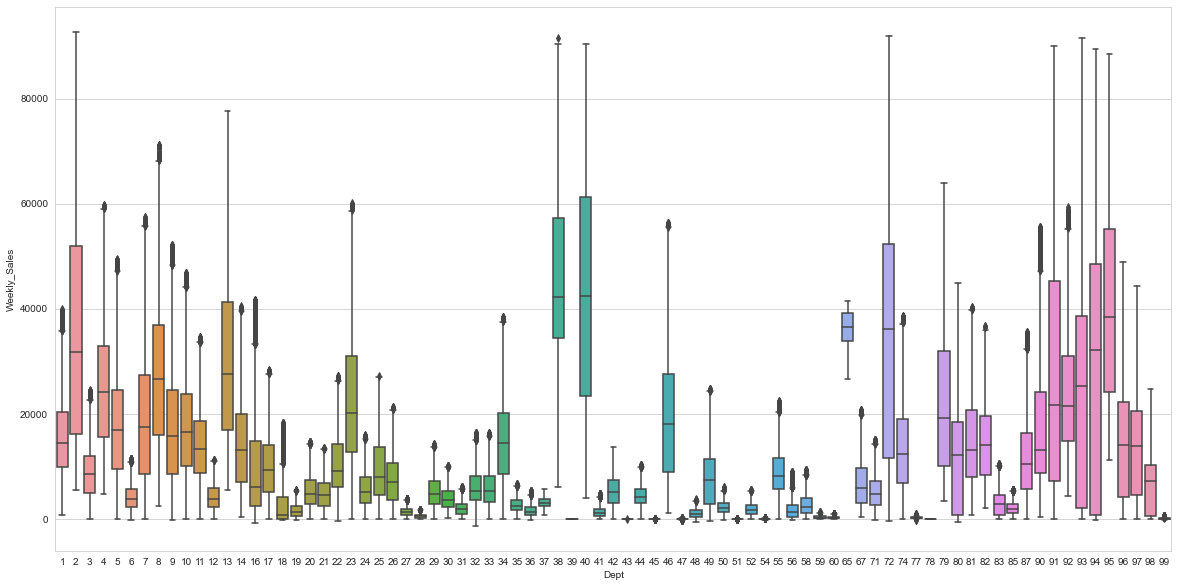

In [149]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Dept',y='Weekly_Sales',data=df_train2)

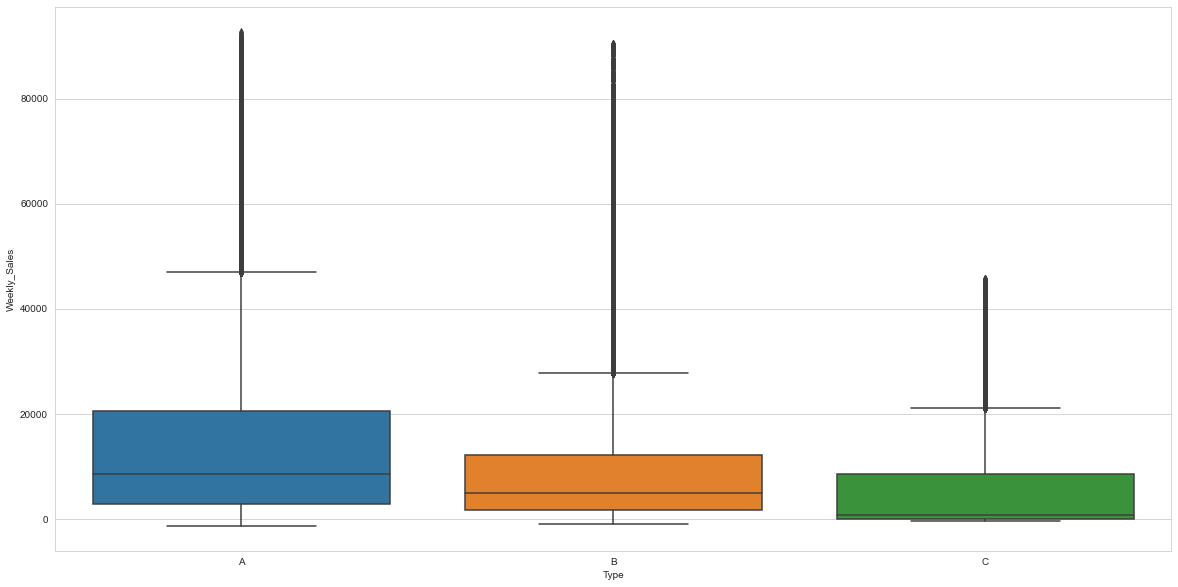

In [150]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Type',y='Weekly_Sales',data=df_train2)

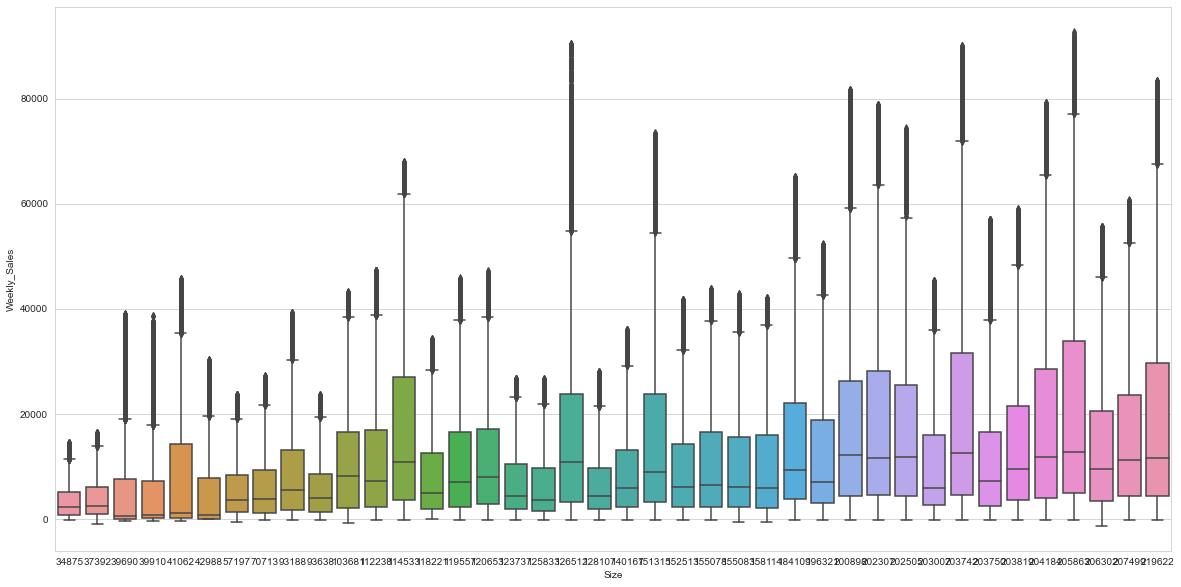

In [151]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Size',y='Weekly_Sales',data=df_train2)

In [152]:
##SKEW Train dataset
df_train2.select_dtypes(include=[object]).columns
        
       


Index(['Type'], dtype='object')

In [153]:
numeric_features = df_train2.dtypes[(df_train2.dtypes != 'object') & (df_train2.dtypes != 'bool')].index
numeric_features



Index(['Store', 'Dept', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'Size',
       'Month', 'Week', 'Year'],
      dtype='object')

In [154]:
from scipy.stats import skew

In [155]:
skewed_features = df_train2[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
skewed_features

Weekly_Sales    2.081395
Dept            0.427552
Store           0.067308
Week            0.051211
Year            0.046657
Month           0.040268
Fuel_Price     -0.114748
Size           -0.315804
Temperature    -0.331993
dtype: float64

In [156]:
high_skewness = skewed_features[abs(skewed_features)>0.9]
skewed_features = high_skewness.index
skewed_features

Index(['Weekly_Sales'], dtype='object')

In [157]:
print(high_skewness)
print('\nVariables with high skewness: \n\n',skewed_features)

Weekly_Sales    2.081395
dtype: float64

Variables with high skewness: 

 Index(['Weekly_Sales'], dtype='object')


In [158]:
##Log transformation es la mejor, sin embargo tenemos ventas igual a 0, e incluso ventas negativas. 
#1)Aplicamos reciprocal transformation
#2) transformamos negativos en positivos u = log(y+1-min(y))

#1)
#df_train2['Weekly_Sales_rec'] = 1/(df_train2['Weekly_Sales'])
#2)
df_train2['Weekly_Sales_log_+'] = np.log(df_train2['Weekly_Sales'] + 1 - df_train2['Weekly_Sales'].min())

In [159]:
df_train2

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,Type,Size,Month,Week,Year,Weekly_Sales_log_+
0,1,1,24924.50,False,42.31,2.572,A,151315,2,5,2010,10.175306
3,1,1,19403.54,False,46.63,2.561,A,151315,2,8,2010,9.939145
4,1,1,21827.90,False,46.50,2.625,A,151315,3,9,2010,10.049766
5,1,1,21043.39,False,57.79,2.667,A,151315,3,10,2010,10.015291
6,1,1,22136.64,False,54.58,2.720,A,151315,3,11,2010,10.063015
...,...,...,...,...,...,...,...,...,...,...,...,...
404761,43,99,50.00,False,57.75,3.308,C,41062,11,46,2011,7.224375
404762,43,99,25.00,False,47.59,3.157,C,41062,1,1,2012,7.205991
404763,43,99,5.00,False,87.75,3.393,C,41062,6,24,2012,7.191038
411931,44,99,0.01,False,40.65,2.681,C,39910,3,9,2010,7.187272


In [160]:
for df in [df_train2,df_test]:
    df['IsHoliday'] = df['IsHoliday'].apply(lambda x: 1 if x==True else 0)





In [161]:
n_train = df_train2.shape[0]


In [162]:
all_data = pd.concat([df_train2,df_test])

In [163]:
all_data = pd.get_dummies(all_data)

In [164]:
#Split to train test again

train = all_data[:n_train]
test = all_data[n_train:]
train.head()


,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,Size,Month,Week,Year,Weekly_Sales_log_+,Type_A,Type_B,Type_C
0,1,1,24924.50,0,42.31,2.572,151315,2,5,2010,10.175306,1,0,0
3,1,1,19403.54,0,46.63,2.561,151315,2,8,2010,9.939145,1,0,0
4,1,1,21827.90,0,46.50,2.625,151315,3,9,2010,10.049766,1,0,0
5,1,1,21043.39,0,57.79,2.667,151315,3,10,2010,10.015291,1,0,0
6,1,1,22136.64,0,54.58,2.720,151315,3,11,2010,10.063015,1,0,0


In [165]:

train = train.drop(['Weekly_Sales'],axis=1)
test = test.drop(['Weekly_Sales','Weekly_Sales_log_+'],axis=1)



In [168]:
train.select_dtypes(include=[object]).columns

Index([], dtype='object')

In [169]:
from sklearn.model_selection import train_test_split


In [170]:

X = train.drop('Weekly_Sales_log_+',axis=1)
y = train['Weekly_Sales_log_+']



In [171]:
y

0         10.175306
3          9.939145
4         10.049766
5         10.015291
6         10.063015
            ...    
404761     7.224375
404762     7.205991
404763     7.191038
411931     7.187272
411932     7.192543
Name: Weekly_Sales_log_+, Length: 378510, dtype: float64

In [172]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [173]:
#since the outcome is a continues variable(Number of sales), it is reasonable to build a regression model

##LINEAR REGRESSION MODEL
from sklearn.linear_model import LinearRegression
##DECISION TREE REGRESSION MODEL
from sklearn.tree import DecisionTreeRegressor
##RANDOM FOREST REGRESSION MODEL
from sklearn.ensemble import RandomForestRegressor
##SUPPORT VECTOR REGRESSION 
from sklearn.svm import SVR

from sklearn import metrics
from sklearn.metrics import r2_score



In [174]:
#regressors = [LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),SVR()?,keras(),votingRegressor()]


In [175]:
##LinearRegression()
lm = LinearRegression()
lm.fit(X_train,y_train)
preds = lm.predict(X_test)
print('LinearRegression()')
print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))
linear_score = r2_score(y_test,preds)
print('R2:', linear_score)


LinearRegression()
MAE: 0.8433310199518775
MSE: 0.9918655641456958
RMSE: 0.9959244771295139
R2: 0.13624540427581466


In [176]:
##RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train,y_train)
preds = rfr.predict(X_test)
print('DecisionTreeRegressor()')
print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))
random_forest_score = r2_score(y_test,preds)
print('R2:', random_forest_score)

DecisionTreeRegressor()
MAE: 0.08146957621995472
MSE: 0.01571548130866508
RMSE: 0.1253614027867632
R2: 0.9863143558007594


In [177]:
##DecisionTreeRegressor()
dtree = DecisionTreeRegressor()
dtree.fit(X_train,y_train)
preds = dtree.predict(X_test)
print('DecisionTreeRegressor()')
print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))
dtree_score = r2_score(y_test,preds)
print('R2:', dtree_score)

DecisionTreeRegressor()
MAE: 0.10527009794163325
MSE: 0.027013637623379026
RMSE: 0.1643582599791657
R2: 0.9764754877194285


In [178]:
#SCALING data
#from sklearn.preprocessing import StandardScaler

In [179]:
#scaling = StandardScaler()
#X_train_scaling = scaling.fit_transform(X_train)
#X_test_scaling = scaling.transform(X_test)


In [180]:
##SVR
#vector_regressor = SVR()
#vector_regressor.fit(X_train_scaling,y_train)
#preds = vector_regressor.predict(X_test_scaling)
#print('Support Vector Machine()')
#print('MAE:', metrics.mean_absolute_error(y_test, preds))
#print('MSE:', metrics.mean_squared_error(y_test, preds))
#print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))
#vector_regressor = r2_score(y_test,preds)
#print('R2:',vector_regressor )

In [181]:
##SVR with GridSearchCV
#from sklearn.model_selection import GridSearchCV


In [182]:
#param_grid = {'C':[0.1,1,10,100,100,1000],'gamma':[1,0.1,0.01,0.001,0.001],'kernel':['rbf','linear','poly']}


In [183]:
#grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=3)

In [184]:
#grid.fit(X_train_scaling,y_train)
#preds = grid.predict(X_test_scaling)
#print('Support Vector Machine() with GridSearchCV')
#print('MAE:', metrics.mean_absolute_error(y_test, preds))
#print('MSE:', metrics.mean_squared_error(y_test, preds))
#print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))
#vector_regressor_grid = r2_score(y_test,preds)
#print('R2:',vector_regressor_grid)

In [185]:
##KERAS REGRESSION
#SCALING
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [186]:
#CREATING A MODEL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

In [187]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

model = Sequential()

model.add(Dense(76,activation='relu'))
model.add(Dense(152,activation='relu'))
model.add(Dense(152,activation='relu'))
model.add(Dense(76,activation='relu'))
model.add(Dense(38,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [188]:
model.fit(x=X_train_scaled,y=y_train.values,
          validation_data=(X_test_scaled,y_test.values),callbacks=[early_stop],
         batch_size=128,epochs=600)

Epoch 1/600
2218/2218 [==============================] - 8s 4ms/step - loss: 1.3670 - val_loss: 0.7358
Epoch 2/600
2218/2218 [==============================] - 7s 3ms/step - loss: 0.7412 - val_loss: 0.7205
Epoch 3/600
2218/2218 [==============================] - 7s 3ms/step - loss: 0.7146 - val_loss: 0.6968
Epoch 4/600
2218/2218 [==============================] - 8s 4ms/step - loss: 0.6799 - val_loss: 0.7137
Epoch 5/600
2218/2218 [==============================] - 9s 4ms/step - loss: 0.6640 - val_loss: 0.6465
Epoch 6/600
2218/2218 [==============================] - 8s 4ms/step - loss: 0.6557 - val_loss: 0.6411
Epoch 7/600
2218/2218 [==============================] - 8s 4ms/step - loss: 0.6455 - val_loss: 0.6537
Epoch 8/600
2218/2218 [==============================] - 8s 4ms/step - loss: 0.6394 - val_loss: 0.6301
Epoch 9/600
2218/2218 [==============================] - 9s 4ms/step - loss: 0.6345 - val_loss: 0.6337
Epoch 10/600
2218/2218 [==============================] - 9s 4ms/step - l

Epoch 80/600
2218/2218 [==============================] - 8s 4ms/step - loss: 0.1189 - val_loss: 0.1002
Epoch 81/600
2218/2218 [==============================] - 8s 4ms/step - loss: 0.1236 - val_loss: 0.1408
Epoch 82/600
2218/2218 [==============================] - 15s 7ms/step - loss: 0.1246 - val_loss: 0.1093
Epoch 83/600
2218/2218 [==============================] - 8s 4ms/step - loss: 0.1151 - val_loss: 0.1046
Epoch 84/600
2218/2218 [==============================] - 8s 3ms/step - loss: 0.1224 - val_loss: 0.1273
Epoch 85/600
2218/2218 [==============================] - 8s 3ms/step - loss: 0.1418 - val_loss: 0.1163
Epoch 86/600
2218/2218 [==============================] - 8s 3ms/step - loss: 0.1294 - val_loss: 0.1246
Epoch 87/600
2218/2218 [==============================] - 8s 3ms/step - loss: 0.1365 - val_loss: 0.1537
Epoch 88/600
2218/2218 [==============================] - 8s 3ms/step - loss: 0.1276 - val_loss: 0.1306
Epoch 89/600
2218/2218 [==============================] - 8s 3m

2218/2218 [==============================] - 7s 3ms/step - loss: 0.1171 - val_loss: 0.1222
Epoch 159/600
2218/2218 [==============================] - 7s 3ms/step - loss: 0.1067 - val_loss: 0.0964
Epoch 160/600
2218/2218 [==============================] - 8s 3ms/step - loss: 0.1089 - val_loss: 0.0881
Epoch 161/600
2218/2218 [==============================] - 7s 3ms/step - loss: 0.1065 - val_loss: 0.1167
Epoch 162/600
2218/2218 [==============================] - 7s 3ms/step - loss: 0.1053 - val_loss: 0.1029
Epoch 163/600
2218/2218 [==============================] - 7s 3ms/step - loss: 0.1064 - val_loss: 0.1059
Epoch 164/600
2218/2218 [==============================] - 8s 4ms/step - loss: 0.1028 - val_loss: 0.0897
Epoch 165/600
2218/2218 [==============================] - 8s 3ms/step - loss: 0.0976 - val_loss: 0.1129
Epoch 166/600
2218/2218 [==============================] - 7s 3ms/step - loss: 0.0996 - val_loss: 0.0890
Epoch 167/600
2218/2218 [==============================] - 7s 3ms/ste

In [189]:
losses = pd.DataFrame(model.history.history)

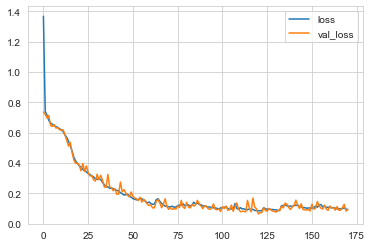

In [190]:
losses.plot()

In [191]:
preds = model.predict(X_test_scaled)

In [192]:
print('Keras Regression()')
print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))
keras_score =  r2_score(y_test,preds)
print('R2:',keras_score)

Keras Regression()
MAE: 0.21245048365635
MSE: 0.09467886425211536
RMSE: 0.3076993081762053
R2: 0.9175500117436295


In [193]:
from sklearn.ensemble import VotingRegressor

In [194]:
vr = VotingRegressor(estimators = [('rfr',rfr),('dtree',dtree)])

In [195]:
vr.fit(X_train,y_train)
preds = vr.predict(X_test)
print('VotingRegressor()')
print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))
voting_score =  r2_score(y_test,preds)
print('R2:',voting_score)


VotingRegressor()
MAE: 0.0879100999440454
MSE: 0.018594803459185346
RMSE: 0.13636276419604196
R2: 0.9838069315791872


In [196]:
models = pd.DataFrame({'Model':['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','KerasRegressor','VotingRegressor'],'Score':[linear_score,dtree_score,random_forest_score,keras_score,voting_score]}).sort_values('Score',ascending=False)

In [197]:
models

,Model,Score
2,RandomForestRegressor,0.986314
4,VotingRegressor,0.983807
1,DecisionTreeRegressor,0.976475
3,KerasRegressor,0.917550
0,LinearRegression,0.136245


In [198]:
# OBVIAMENTE DESCARTAMOS LINEAR REGRESSION COMO MODELO.


In [199]:
#RESULTS
test_results = test.copy()

test_results_scaled = scaler.transform(test_results.values)

In [226]:
len(test)

115064

In [231]:
Y_pred_rfr = rfr.predict(test_results)
Y_pred_voting = vr.predict(test_results)
Y_pred_dtree = dtree.predict(test_results)
Y_pred_keras = model.predict(test_results_scaled)

In [234]:
Y_pred_rfr = pd.DataFrame(Y_pred_rfr,columns=['Weekly_Sales'])
Y_pred_voting = pd.DataFrame(Y_pred_voting,columns=['Weekly_Sales'])
Y_pred_dtree = pd.DataFrame(Y_pred_dtree,columns=['Weekly_Sales'])
Y_pred_keras = pd.DataFrame(Y_pred_keras,columns=['Weekly_Sales'])

In [235]:
Y_pred_rfr['Weekly_Sales'] = np.floor(np.exp(Y_pred_rfr['Weekly_Sales']))
Y_pred_voting['Weekly_Sales'] = np.floor(np.exp(Y_pred_voting['Weekly_Sales']))
Y_pred_dtree['Weekly_Sales'] = np.floor(np.exp(Y_pred_dtree['Weekly_Sales']))
Y_pred_keras['Weekly_Sales'] = np.floor(np.exp(Y_pred_keras['Weekly_Sales']))

In [237]:
Y_pred_rfr.to_csv('OVJ_walmart_submission_rfr.csv',index=True)
Y_pred_voting.to_csv('OVJ_walmart_submission_voting.csv',index=True)
Y_pred_dtree.to_csv('OVJ_walmart_submission_dtree.csv',index=True)
Y_pred_keras.to_csv('OVJ_walmart_submission_keras.csv',index=True)